In [247]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

In [248]:
IMG_DIR = 'report/img'
def save_pic(name):
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, name))

In [249]:
interesting_columns = ['person_id', 'person_name', 'year', 'office_id',
           'office_name', 'income_personal', 'income_relatives']

In [250]:
# officials_income = pd.read_csv('data/officials_income.csv')
# officials_income.head()

In [251]:
# officials_income.shape

In [252]:
# outliers = officials_income[
#     (
#         officials_income.income < officials_income.income.mean() - 3 * officials_income.income.std() 
#     ) 
#     |
#     (
#         officials_income.income > officials_income.income.mean() + 3 * officials_income.income.std()
#     )
# ]
# print(outliers.shape)
# outliers.sort_values(by='income').head(10)

In [253]:
declarations_df_source = pd.read_csv('data/declarations_clean.csv')
declarations_df_source.head()

,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
0,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2009,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,2075542.33,102279.19,0.0,3,448.7,2177821.52
1,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2010,14,государственная дума,член комитетa государственной думы,7,федеральный без региональной структуры,NaN,NaN,2127686.49,168601.94,0.0,3,448.7,2296288.43
2,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2011,14,государственная дума,NaN,7,федеральный без региональной структуры,NaN,NaN,2177566.64,137656.24,0.0,3,448.7,2315222.88
3,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2012,14,государственная дума,член комитета гд по науке и наукоемким техноло...,7,федеральный без региональной структуры,NaN,NaN,2458749.04,194266.38,0.0,3,448.7,2653015.42
4,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2013,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,3194615.67,198267.22,0.0,3,448.7,3392882.89


In [254]:
print('Unique persons', declarations_df_source.person_id.unique().shape[0])
print('Unique offices', declarations_df_source.office_id.unique().shape[0])
print('Unique regions', declarations_df_source.office_region_id.unique().shape[0])

Unique persons 51672
Unique offices 2104
Unique regions 86


In [255]:
declarations_df_source.shape

(89470, 18)

Remove outliers

In [256]:
declarations_df = declarations_df_source.copy()

In [257]:
# declarations_df = declarations_df_source[~declarations_df_source.person_id.isin(outliers.person_id)]
# declarations_df['income'] = declarations_df_source['income_personal'] + declarations_df_source['income_relatives']
# declarations_df = declarations_df[~(
#     (
#         declarations_df.income < declarations_df.income.mean() - 3 * declarations_df.income.std() 
#     ) 
#     |
#     (
#         declarations_df.income > declarations_df.income.mean() + 3 * declarations_df.income.std()
#     )
# )]
# declarations_df.shape

In [258]:
declarations_df.sample(5)

,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
44438,антикоррупционная декларация,NaN,20364,треглазов петр александрович,2012,63,прокуратура ростовской области,прокурор города ростованадону,18,региональный без структуры,76.0,ростовская область,882494.00,108233.0,0.0,14,2556.2,990727.00
23493,антикоррупционная декларация,NaN,9346,азанова г н,2014,1397,калининград городской округ,главный специалист,20,муниципальный без структуры,46.0,калининградская область,578280.64,190000.0,0.0,4,267.5,768280.64
16789,антикоррупционная декларация,NaN,5585,наумов олег владимирович,2010,498,федеральное архивное агентство,заместитель руководителя федерального архивног...,7,федеральный без региональной структуры,NaN,NaN,936232.00,0.0,0.0,0,0.0,936232.00
69738,антикоррупционная декларация,NaN,36251,лось наталья николаевна,2015,5760,управление федеральной налоговой службы калужс...,заместитель начальника межрайонной инспекции ф...,18,региональный без структуры,97.0,калужская область,524136.00,204000.0,0.0,12,4346.3,728136.00
63659,антикоррупционная декларация,NaN,32379,котиков зилимхан хамбердович,2016,153,правительство республики ингушетия,исполняющий обязанности министра труда занятос...,18,региональный без структуры,8.0,республика ингушетия,0.01,159852.0,0.0,11,6060.0,159852.01


In [259]:
declarations_df.shape

(89470, 18)

In [260]:
# declarations_df['office_name_sep'] = declarations_df.office_name.apply(lambda x: x.replace(' ', '\n')) # For plotting

In [261]:
# office_names = declarations_df[['office_id', 'office_name']].drop_duplicates().reset_index(drop=True)
# office_names.index = office_names.office_id
# office_names = office_names.drop(['office_id'], axis=1)
# office_names

In [262]:
# office_names_sep = declarations_df[['office_id', 'office_name_sep']].drop_duplicates().reset_index(drop=True)
# office_names_sep.index = office_names_sep.office_id
# office_names_sep = office_names_sep.drop(['office_id'], axis=1)
# office_names_sep

# Plan
## Meta
* Total declarations
* Declarations by year
* Declarations by office
* Office types

## Basic info 
* Total people
* Total offices
* People distribution by years
* People distribution by office
* People distribution by years by office

## Declared assets
* Income, distributions
    * By year
* Richest people by year
    * Top 10 richest people in each year
* Median incomes by office
* Income vs years worked


# Meta

In [263]:
print(declarations_df.shape)

(89470, 18)


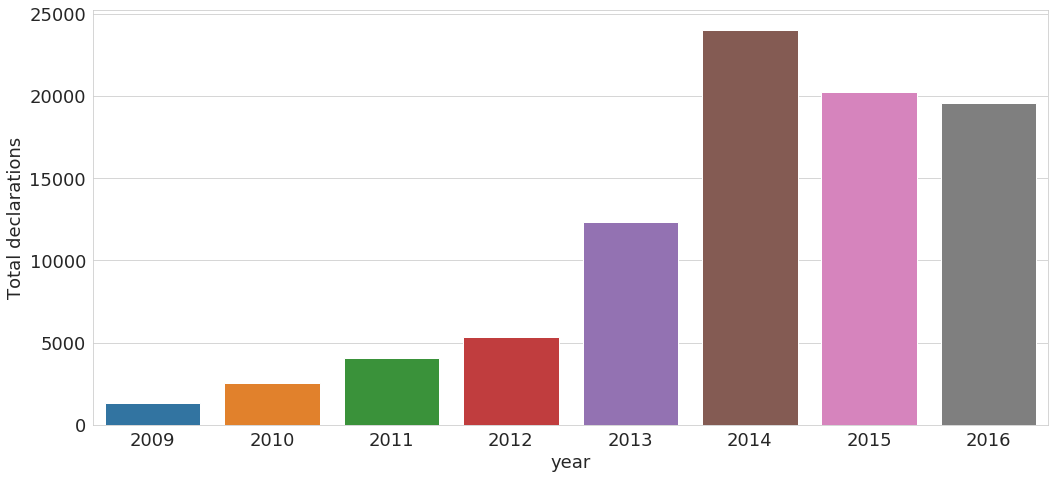

In [264]:
dec_count = declarations_df.groupby(['year'])['person_id'].count()
plt.figure(figsize=(15, 7))
sns.barplot(dec_count.index, dec_count)
plt.ylabel('Total declarations')
save_pic('total_dec')
plt.show()

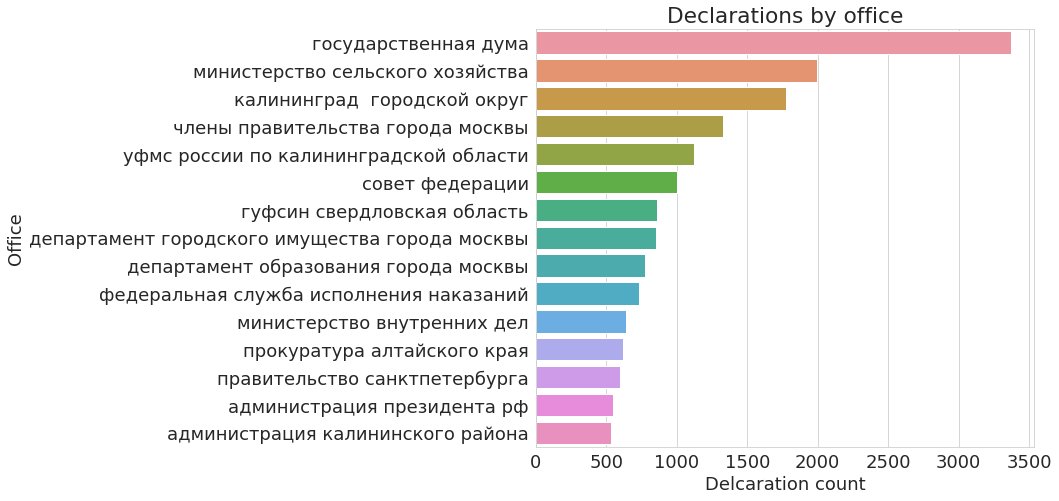

In [265]:
dec_count = declarations_df.groupby(['office_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office')
plt.xlabel('Delcaration count')
save_pic('dec_by_office')
plt.title('Declarations by office')
plt.show()

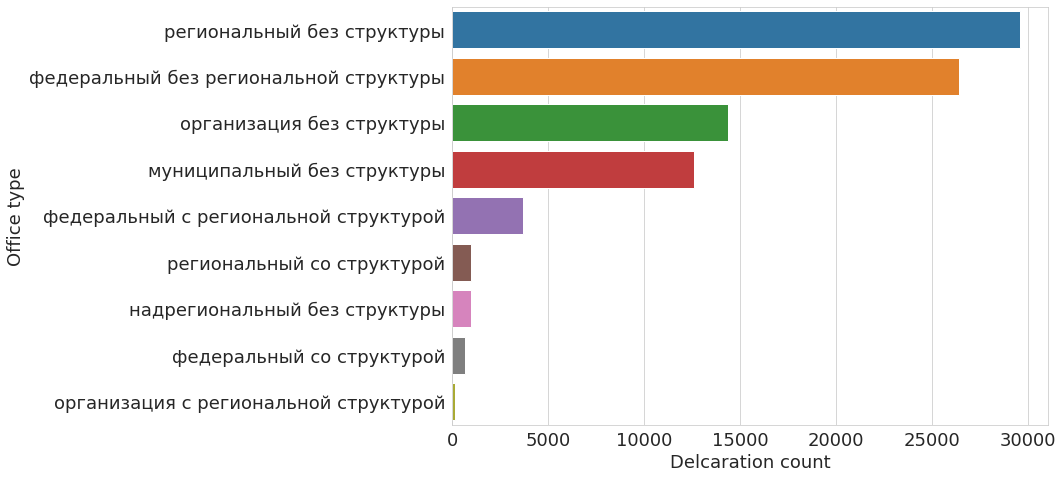

In [266]:
dec_count = declarations_df.groupby(['office_type_name'])['person_id'].count().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office type')
plt.xlabel('Delcaration count')
save_pic('dec_by_office_type')
# plt.title('Declarations by office type')
plt.show()

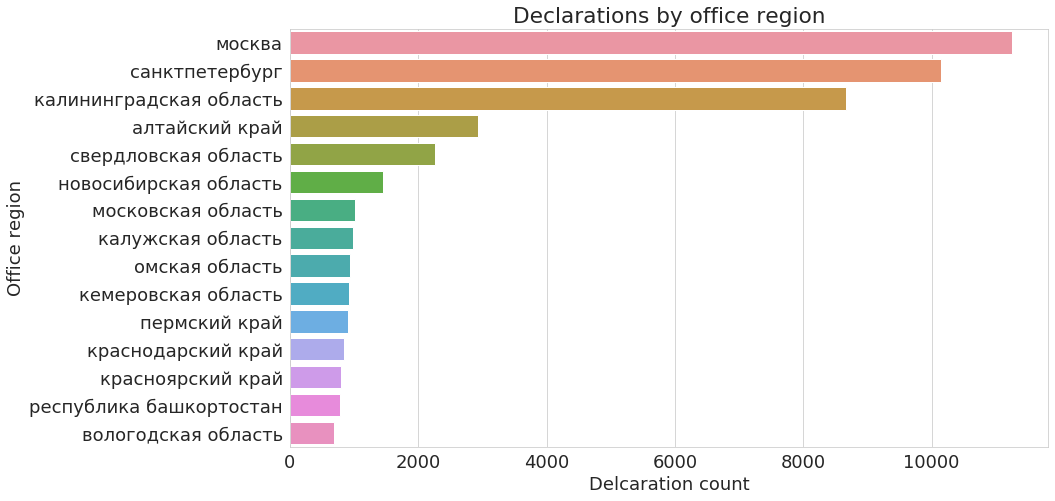

In [267]:
dec_count = declarations_df.groupby(['office_region_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
save_pic('dec_by_office_region')
plt.title('Declarations by office region')
plt.show()

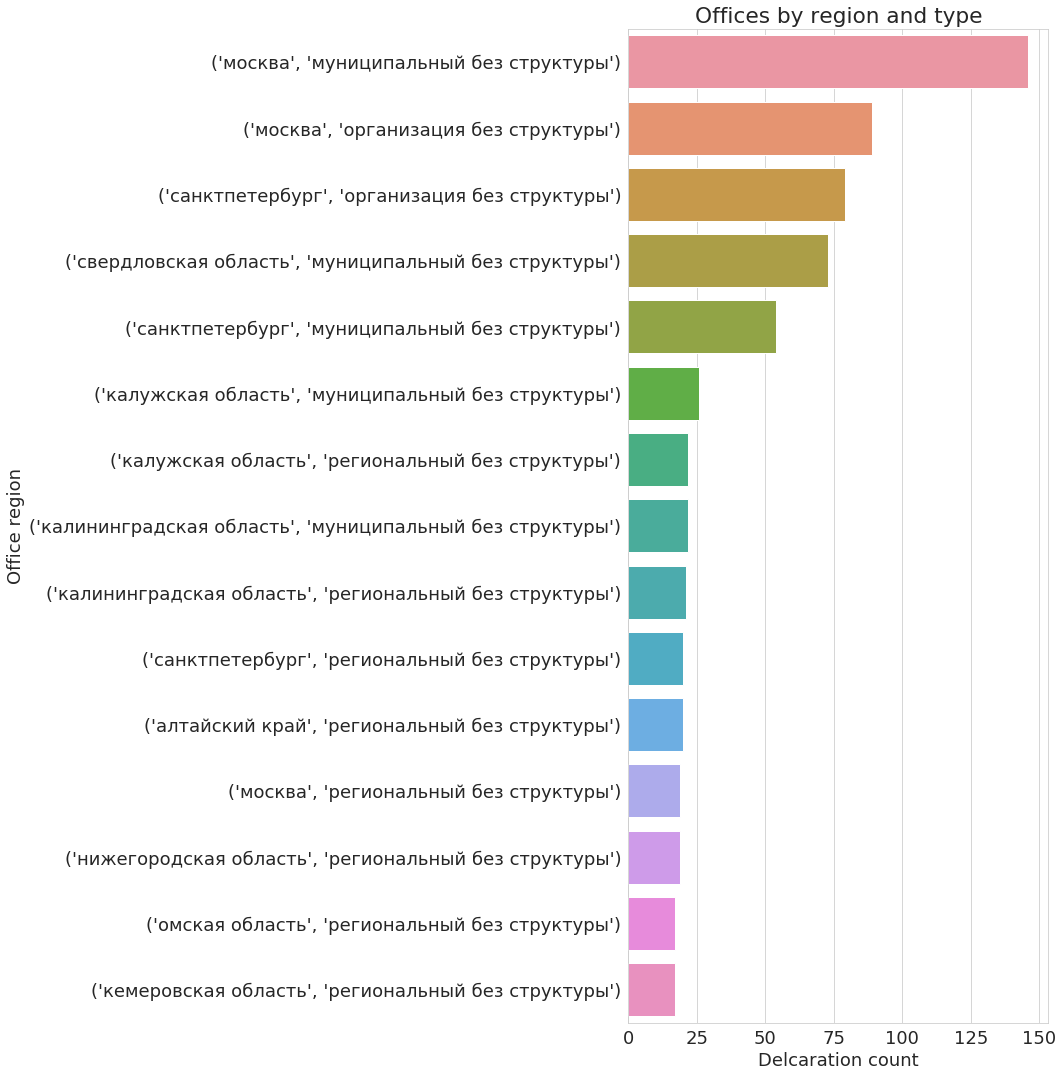

In [268]:
office_count = declarations_df.groupby([ 'office_region_name', 'office_type_name'])['office_id'].nunique().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 15))
sns.barplot(office_count, office_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
save_pic('office_by_region_and_type')
plt.title('Offices by region and type')
plt.show()

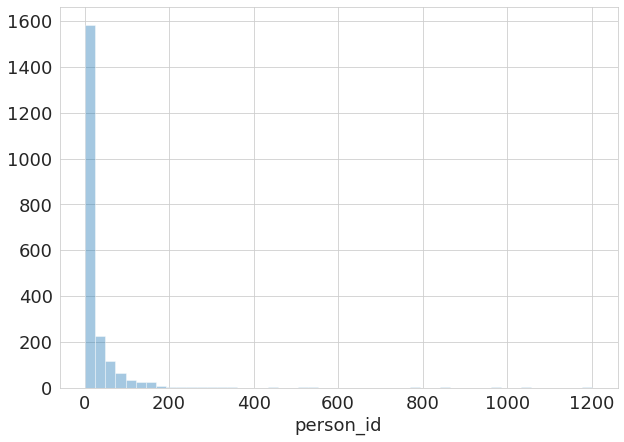

In [269]:
# people by office
people_by_office = declarations_df.groupby(['office_id'])['person_id'].nunique()
plt.figure(figsize=(10, 7))
sns.distplot(people_by_office, kde=False)
plt.show()

In [270]:
# office_count.reset_index()

In [271]:
# declarations_df.head().T

# People distribution, offices

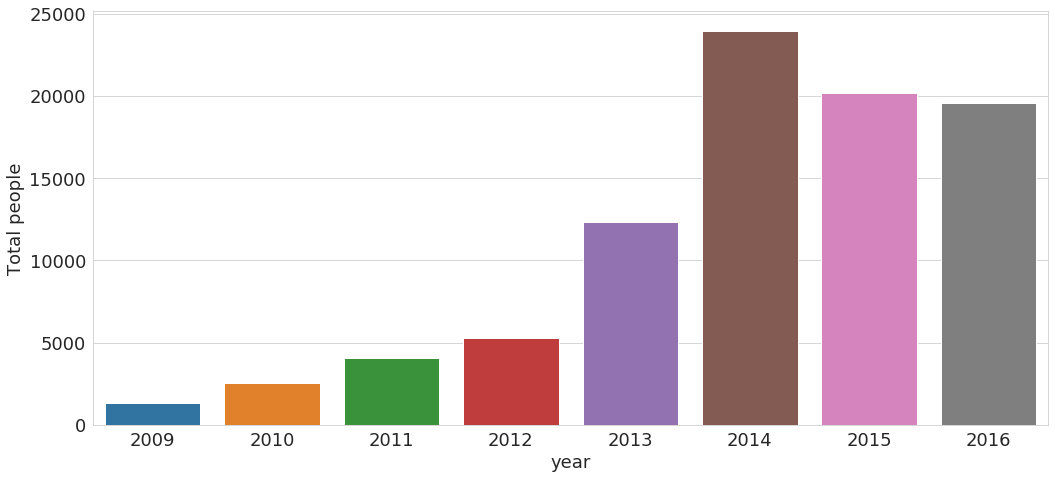

In [272]:
people_count = declarations_df.groupby(['year'])['person_id'].nunique()
plt.figure(figsize=(15, 7))
sns.barplot(people_count.index, people_count)
plt.ylabel('Total people')
save_pic('total_people')
plt.show()

Top 10 offices by unique people


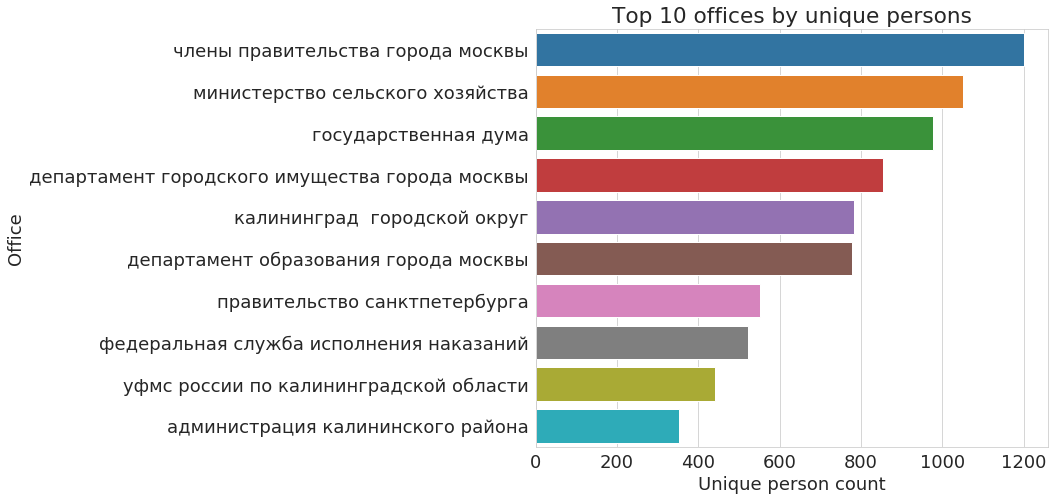

In [273]:
print('Top 10 offices by unique people')
unique_per_office = declarations_df.groupby(['office_id'])['person_id'].nunique().sort_values(ascending=False)

to_plot = unique_per_office.head(10)
plt.figure(figsize=(15, 7))
sns.barplot(y=office_names.loc[to_plot.index].values.flatten(), x=to_plot.values)
plt.ylabel('Office')
plt.xlabel('Unique person count')
save_pic('unique_by_office')
plt.title('Top 10 offices by unique persons')
plt.show()

People per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


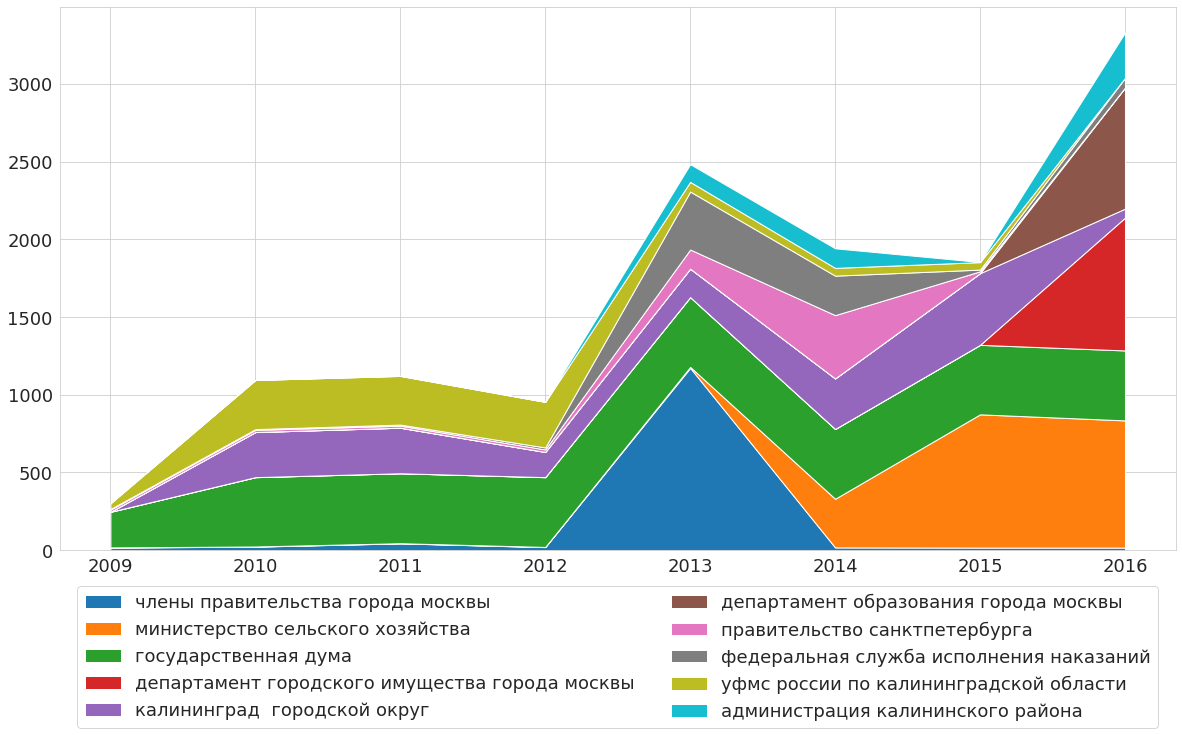

In [274]:
print('People per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['person_id'].nunique()
grouped.head()
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
y = pd.DataFrame(y).T
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y.T, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

Top 15 office posts by unique people


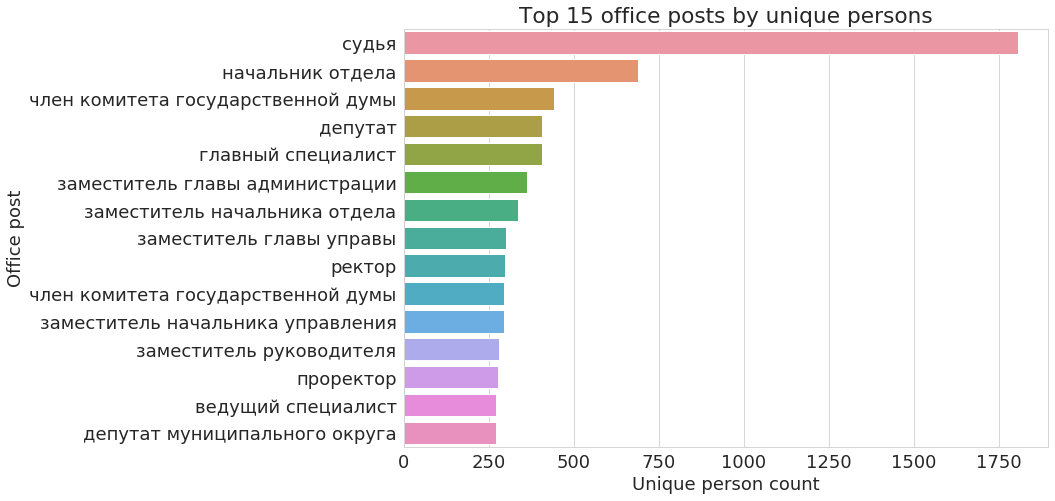

In [275]:
print('Top 15 office posts by unique people')
unique_per_office_post = declarations_df.groupby(['office_post'])['person_id'].nunique().sort_values(ascending=False)
to_plot = unique_per_office_post.head(15)
plt.figure(figsize=(15, 7))
sns.barplot(y=to_plot.index, x=to_plot.values)
plt.ylabel('Office post')
plt.xlabel('Unique person count')
save_pic('unique_by_office')
plt.title('Top 15 office posts by unique persons')
plt.show()

In [276]:
# Переходы из учреждения в учреждение?

In [277]:
grouped[979]

year
2009      17
2010      23
2011      44
2012      20
2013    1173
2014      18
2015      17
2016      17
Name: person_id, dtype: int64

In [278]:
prev_workplaces = declarations_df[['person_id', 'year', 'office_id']].merge(declarations_df[['person_id', 'year', 'office_id']],  on='person_id', suffixes=('_cur', '_prev'))
prev_workplaces = prev_workplaces[prev_workplaces.year_cur - prev_workplaces.year_prev == 1]
prev_workplaces = prev_workplaces.sort_values(by=['person_id', 'year_cur'])
prev_workplaces.head()

,person_id,year_cur,office_id_cur,year_prev,office_id_prev
8,8,2010,14,2009,14
17,8,2011,14,2010,14
26,8,2012,14,2011,14
35,8,2013,14,2012,14
44,8,2014,14,2013,14


In [279]:
prev_workplaces.shape, declarations_df.shape

((34362, 5), (89470, 18))

In [280]:
transitions = prev_workplaces.drop_duplicates()
transition_tuples = transitions[['year_cur', 'year_prev', 'office_id_prev', 'office_id_cur']].sort_values(by=['year_cur', 'office_id_prev'])
transition_tuples.head()

,year_cur,year_prev,office_id_prev,office_id_cur
89872,2010,2009,1,1
90139,2010,2009,1,1
22633,2010,2009,3,3
22682,2010,2009,3,3
22731,2010,2009,3,3


In [281]:
transition_tuples.shape

(34359, 4)

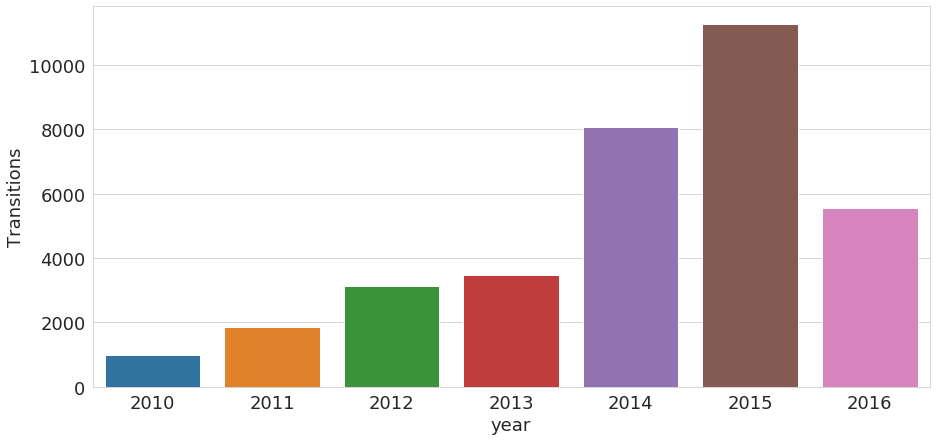

In [282]:
plt.figure(figsize=(15, 7))
sns.countplot(x=transition_tuples.year_cur)
plt.ylabel('Transitions')
plt.xlabel('year')
plt.show()

In [283]:
transitions_per_year = transition_tuples.groupby(['year_cur', 'office_id_prev', 'office_id_cur']).count().sort_values(by=['year_cur', 'office_id_prev'], ascending=False)#.reset_index()
transitions_per_year.head()

year_prev
year_cur office_id_prev office_id_cur           
2016     6661           6661                   4
         6660           6660                   7
         6659           6659                   5
         6658           6658                   5
         6657           6657                   3

In [284]:
from collections import defaultdict
year_graphs = defaultdict(lambda: defaultdict(int))

for row in transitions_per_year.itertuples():
    year, v1, v2 = row.Index
    weight = row.year_prev
    year_graphs[year][(v1, v2)] += weight

In [285]:
# year_graphs[2016]

In [286]:
import networkx as nx

In [287]:
office_names_dict = {k: v['office_name'] for k, v in office_names.to_dict(orient='index').items()}

In [288]:
office_names_dict[118]

'государственное  собрание  курултай республики башкортостан'

/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


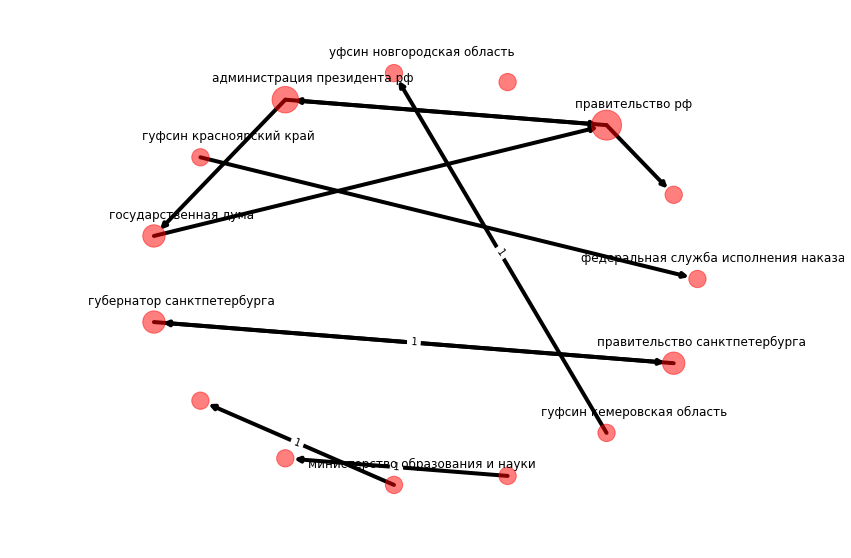

In [289]:
def draw_graph(graph, labels):
    plt.figure(figsize=(15, 10))
    
#     pos = nx.spring_layout(graph, k=3 * 1/np.sqrt(len(graph.nodes())))
    degree_centrality = dict(graph.degree(weight='weight'))# nx.degree_centrality(graph)
    degree_centrality = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['centrality'])
    degree_centrality = degree_centrality.centrality
    
    graph = graph.subgraph(degree_centrality.nlargest(15).index)
    pos = nx.circular_layout(graph)
    
    #edges
    edgelist= graph.edges()
    weights = nx.get_edge_attributes(graph, 'weight')
    weights_arr = np.array([weights[e] for e in edgelist])
    weights_normed = weights_arr/weights_arr.max()

    edges = nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(),
                       width=weights_normed*4)
    
    for i, edge in enumerate(edgelist):
        edges[i].set_alpha(max(weights_normed[i], 0.3))
        
    #nodes
    node_sizes = [(200*degree_centrality[n]+100) for n in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, arrowstyle='->',alpha=0.5)
    

    #labels
    pos_higher = {}
    x_off = 0.1
    y_off = 0.1  # offset on the y axis

    for k, v in pos.items():
        pos_higher[k] = (v[0]+0.1, v[1]+y_off)

    node_labels = {n: (labels[n] if n in degree_centrality.nlargest(10).index else '') for n in graph.nodes()}
    nx.draw_networkx_labels(graph, pos_higher, labels=node_labels, )
    
    weights_sorted = pd.DataFrame.from_dict(weights, orient='index', columns=['weight']).weight.sort_values(ascending=False)
    edge_labels = {e: weights[e] for e in edgelist if e in weights_sorted[:5].index}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.axis('off')
    plt.margins(0.2, 0.1)
    plt.show()

year = 2010

graph = nx.DiGraph()
for k, w in year_graphs[year].items():
    v1, v2 = k
    if v1 == v2:
        continue
    graph.add_edge(v1, v2, weight=w)

draw_graph(graph, labels=office_names_dict)

/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


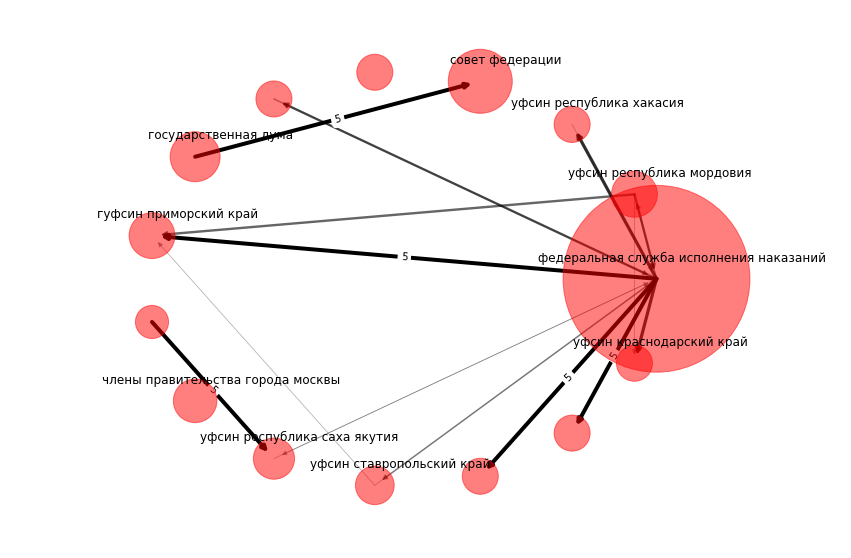

In [290]:
year = 2014

graph = nx.DiGraph()
for k, w in year_graphs[year].items():
    v1, v2 = k
    if v1 == v2:
        continue
    graph.add_edge(v1, v2, weight=w)
draw_graph(graph, labels=office_names_dict)

/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/boris/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


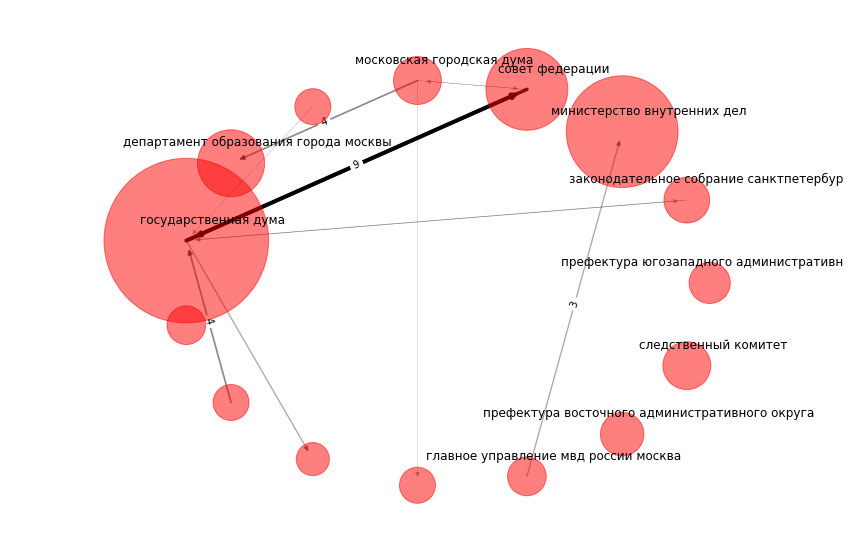

In [291]:
year = 2016

graph = nx.DiGraph()
for k, w in year_graphs[year].items():
    v1, v2 = k
    if v1 == v2:
        continue
    graph.add_edge(v1, v2, weight=w)
draw_graph(graph, labels=office_names_dict)

# Declared assets

In [292]:
def no_outlier(s, q=0.95):
    return s[s < s.quantile(q)]


In [293]:
declarations_df.income_personal

0        2075542.33
1        2127686.49
2        2177566.64
3        2458749.04
4        3194615.67
            ...    
89465     912171.66
89466     875869.53
89467    5153430.55
89468    3100832.87
89469    4097215.76
Name: income_personal, Length: 89470, dtype: float64

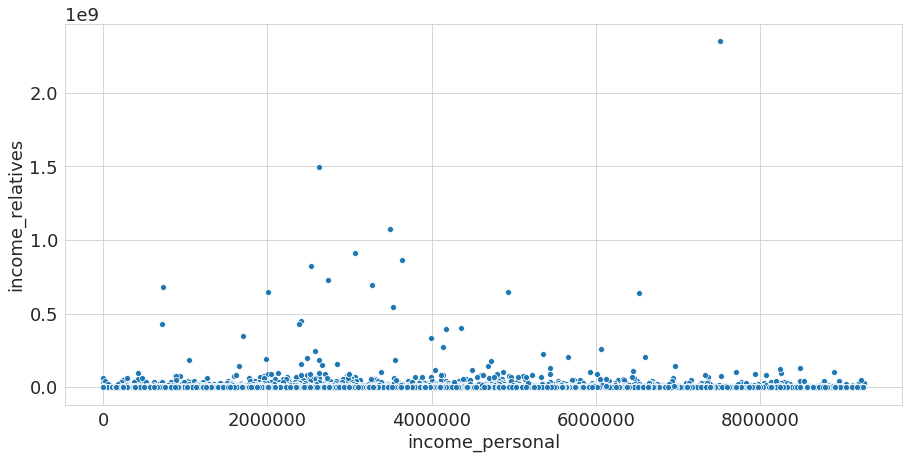

In [294]:
plt.figure(figsize=(15, 7))
pers = no_outlier(declarations_df['income_personal'])
rel = declarations_df.loc[pers.index]['income_relatives']
sns.scatterplot(pers, rel)
plt.show()

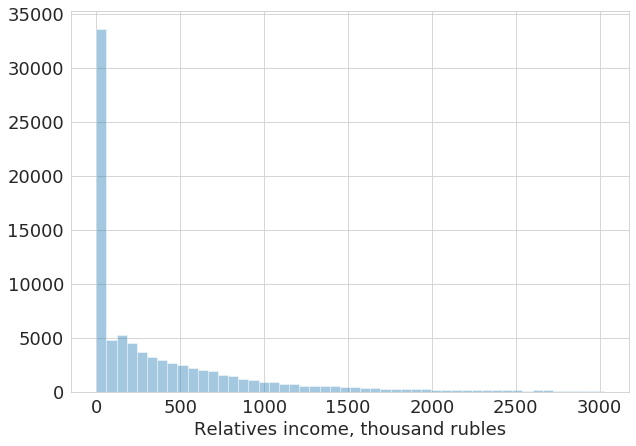

In [295]:
plt.figure(figsize=(10, 7))
sns.distplot(no_outlier(declarations_df['income_relatives'])/1000, kde=False)
plt.xlabel('Relatives income, thousand rubles')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/boris/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/boris/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


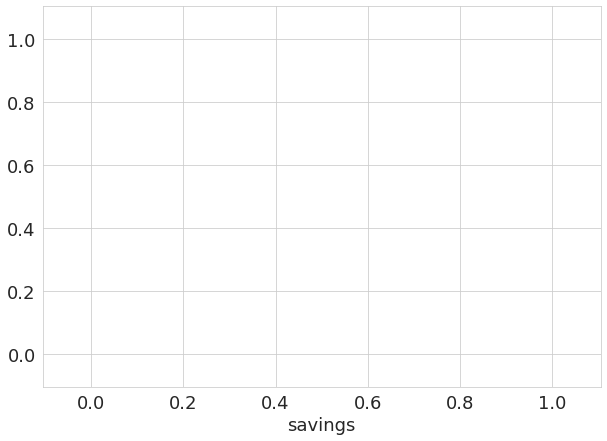

In [296]:
plt.figure(figsize=(10, 7))
sns.distplot(no_outlier(declarations_df['savings'], q=0.99))
plt.show()

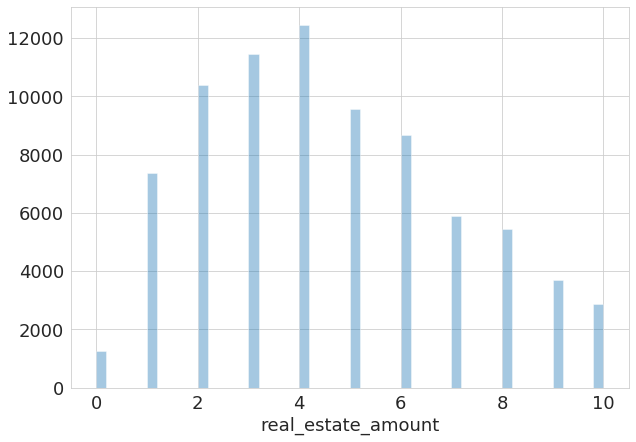

In [297]:
plt.figure(figsize=(10, 7))
sns.distplot(no(declarations_df['real_estate_amount']), kde=False)
plt.show()

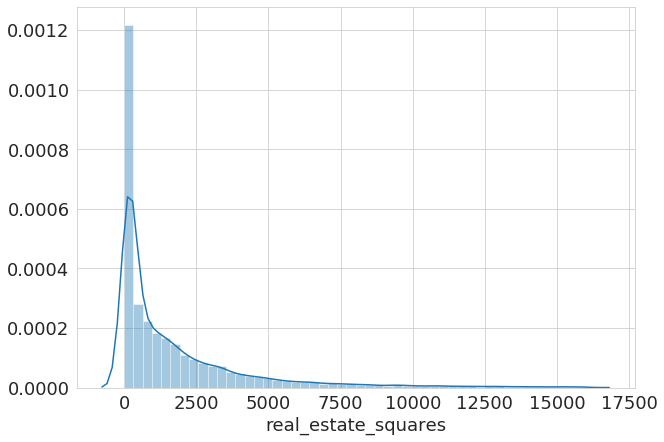

In [298]:
plt.figure(figsize=(10, 7))
sns.distplot(no_outlier(declarations_df['real_estate_squares']))
plt.show()

In [397]:
income_sum = declarations_df.groupby(['person_id'])['income'].sum()
print(income_sum.shape)
income_sum.head()

(51672,)


person_id
8     2.989557e+07
9     1.344564e+08
10    2.923809e+07
11    9.210708e+06
12    4.928650e+07
Name: income, dtype: float64

In [398]:
income_sum = income_sum[income_sum.between(income_sum.quantile(0),
                      income_sum.quantile(.95))]

In [399]:
income_sum = income_sum.sort_values(ascending=False)

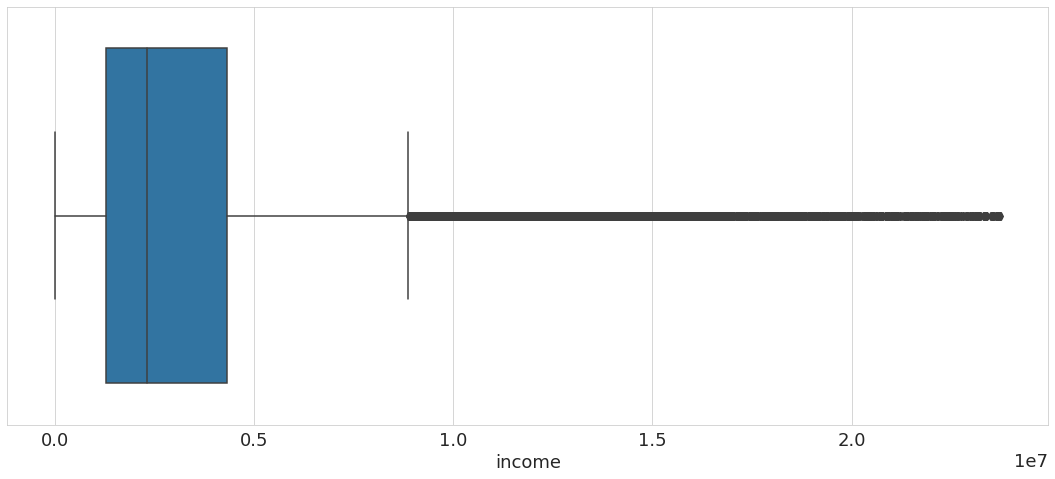

In [400]:
plt.figure(figsize=(15, 7))
sns.boxplot(income_sum)
save_pic('income_boxplot_1')
plt.show()

### Income
* Total income per year
* Median income per year
* Median income per office
* Top offices by median income, per year

In [401]:
yearly_assets_sum = declarations_df.groupby(['year']).sum()
yearly_assets_sum.head()

,person_id,office_id,office_type_id,office_region_id,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
year,,,,,,,,,,
2009,14176929,677522,17451,41647.0,9.100078e+09,3.162225e+09,3582251.23,7318,8.450908e+07,1.226230e+10
2010,24597368,2973915,32405,75892.0,1.462122e+10,7.271776e+09,4961528.98,13059,1.103749e+09,2.189300e+10
2011,37499642,4876663,58233,146763.0,2.844324e+10,1.019863e+10,5337481.16,21554,1.672665e+09,3.864187e+10
2012,49042107,6509725,79577,194931.0,2.628991e+10,1.248533e+10,0.00,29310,9.033232e+08,3.877524e+10
2013,223025368,23237238,168479,405529.0,4.338785e+10,1.414704e+10,36478.00,64853,1.422688e+09,5.753489e+10


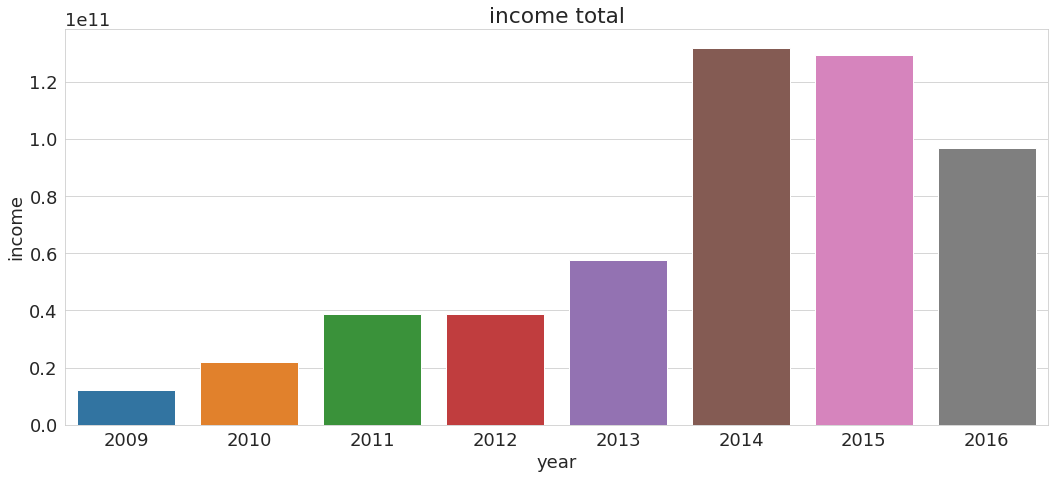

In [402]:
plt.figure(figsize=(15, 7))
plt.title('income total')
sns.barplot(yearly_assets_sum.index, yearly_assets_sum.income)
save_pic('income_by_years')
plt.show()

In [403]:
yearly_assets_median = declarations_df.groupby(['year']).median()
yearly_assets_median.head()

,person_id,office_id,office_type_id,office_region_id,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
year,,,,,,,,,,
2009,5379.0,88.0,18.0,53.0,1470427.00,159000.000,0.0,5.0,1177.7,1857966.00
2010,5078.5,476.5,8.0,46.0,1204897.00,140354.500,0.0,4.0,763.0,1520935.18
2011,3933.0,560.0,18.0,46.0,1163023.00,151924.000,0.0,4.0,782.4,1499000.00
2012,4064.5,695.0,18.0,46.0,1372685.00,161518.725,0.0,4.0,818.4,1727806.50
2013,11215.5,1156.0,18.0,46.0,1259943.87,191918.245,0.0,4.0,494.7,1633498.35


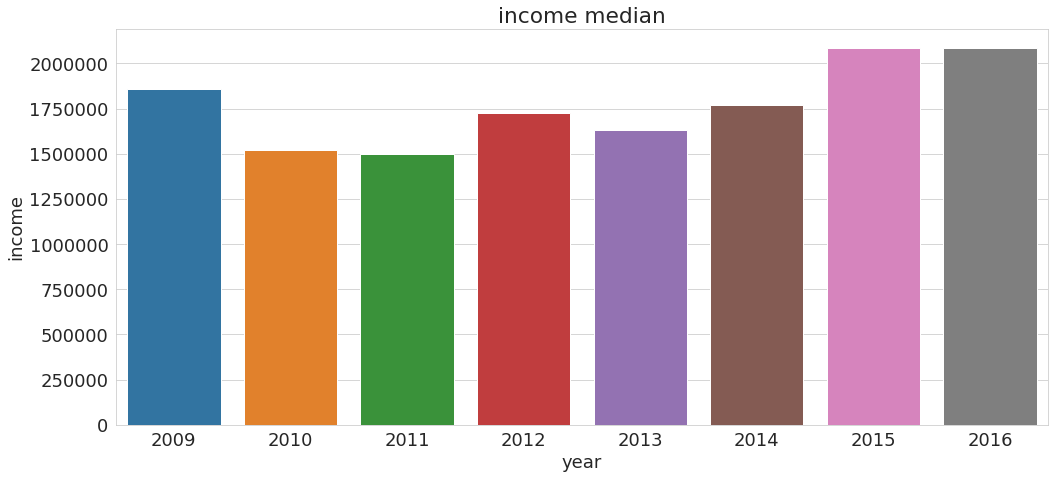

In [404]:
plt.figure(figsize=(15, 7))
plt.title('income median')
sns.barplot(yearly_assets_median.index, yearly_assets_median.income)
save_pic('income_by_years_med')
plt.show()   

In [405]:
office_people_counts = declarations_df.groupby(['office_id'])['person_id'].count().sort_values(ascending=False)
big_offices = office_people_counts[office_people_counts > office_people_counts.quantile(0.75)] # over 35 people in office 
big_offices.shape

(523,)

In [406]:
big_office_declarations = declarations_df[declarations_df.office_id.isin(big_offices.index)]
print(big_office_declarations.shape)
big_office_declarations.head()

(72756, 18)


,document_type,party,person_id,person_name,year,office_id,office_name,office_post,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
0,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2009,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,2075542.33,102279.19,0.0,3,448.7,2177821.52
1,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2010,14,государственная дума,член комитетa государственной думы,7,федеральный без региональной структуры,NaN,NaN,2127686.49,168601.94,0.0,3,448.7,2296288.43
2,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2011,14,государственная дума,NaN,7,федеральный без региональной структуры,NaN,NaN,2177566.64,137656.24,0.0,3,448.7,2315222.88
3,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2012,14,государственная дума,член комитета гд по науке и наукоемким техноло...,7,федеральный без региональной структуры,NaN,NaN,2458749.04,194266.38,0.0,3,448.7,2653015.42
4,антикоррупционная декларация,кпрф,8,зюганов геннадий андреевич,2013,14,государственная дума,член комитета государственной думы,7,федеральный без региональной структуры,NaN,NaN,3194615.67,198267.22,0.0,3,448.7,3392882.89


In [407]:
# # Total income per office
# office_assets_sum = declarations_df.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
# office_assets_sum.head()
# to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
# to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:50]+'...' if len(x) > 50 else x)
# plt.figure(figsize=(20, 7))
# plt.title('Top 10 offices by personal income, income total')
# sns.barplot(y=to_plot.office_name, x=to_plot.income)
# # save_pic('office_incomes')
# plt.show()

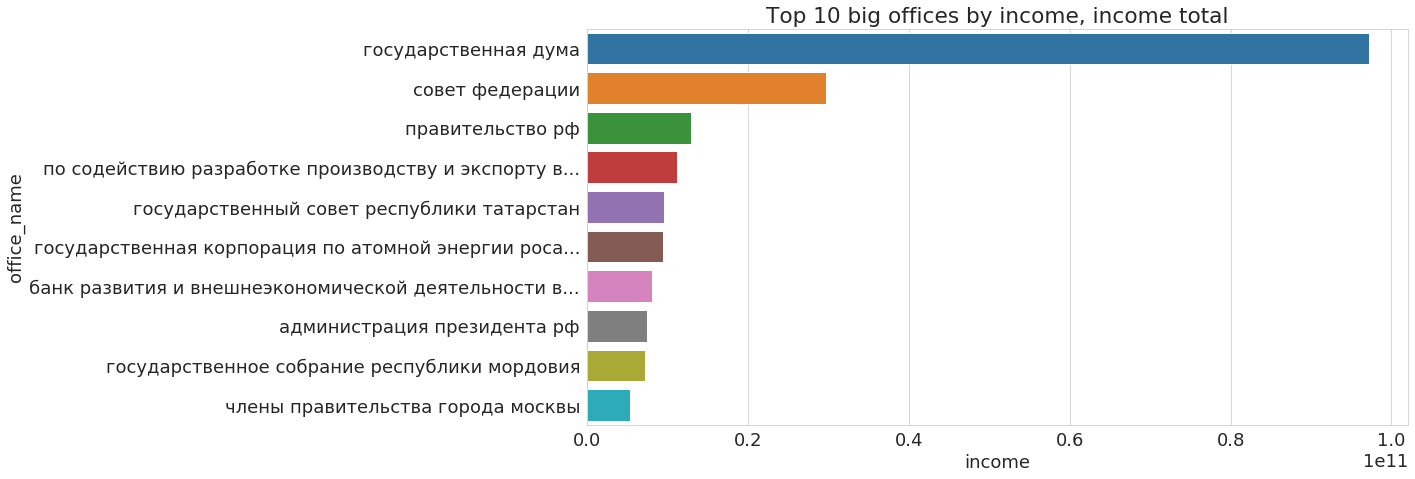

In [408]:
# Total income per office, only big offices
office_assets_sum = big_office_declarations.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:50]+'...' if len(x) > 50 else x)
plt.figure(figsize=(20, 7))
plt.title('Top 10 big offices by income, income total')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
save_pic('big_office_incomes')
plt.show()

In [409]:
# Median income per office
office_assets_median = big_office_declarations.groupby(['office_name']).median().sort_values(by='income', ascending=False)
office_assets_median.head()

,person_id,year,office_id,office_type_id,office_region_id,income_personal,income_relatives,savings,real_estate_amount,real_estate_squares,income
office_name,,,,,,,,,,,
законодательное собрание ямалоненецкого автономного округа,15341.0,2015.0,954.0,18.0,104.0,1.835870e+07,946923.350,0.0,7.0,2117.50,18989454.68
центральный банк,19726.0,2016.0,612.0,7.0,NaN,1.448306e+07,471896.500,0.0,8.5,2590.95,15771908.20
министерство финансов,11670.0,2016.0,604.0,7.0,NaN,1.487759e+07,8472.330,0.0,9.0,3584.80,15764996.02
государственная корпорация по атомной энергии росатом,38411.0,2014.0,969.0,21.0,NaN,1.380369e+07,344301.340,0.0,8.0,2229.90,15162543.02
банк развития и внешнеэкономической деятельности внешэкономбанк,32297.5,2014.0,966.0,21.0,NaN,1.122073e+07,33052.425,0.0,7.0,1622.65,12522960.94


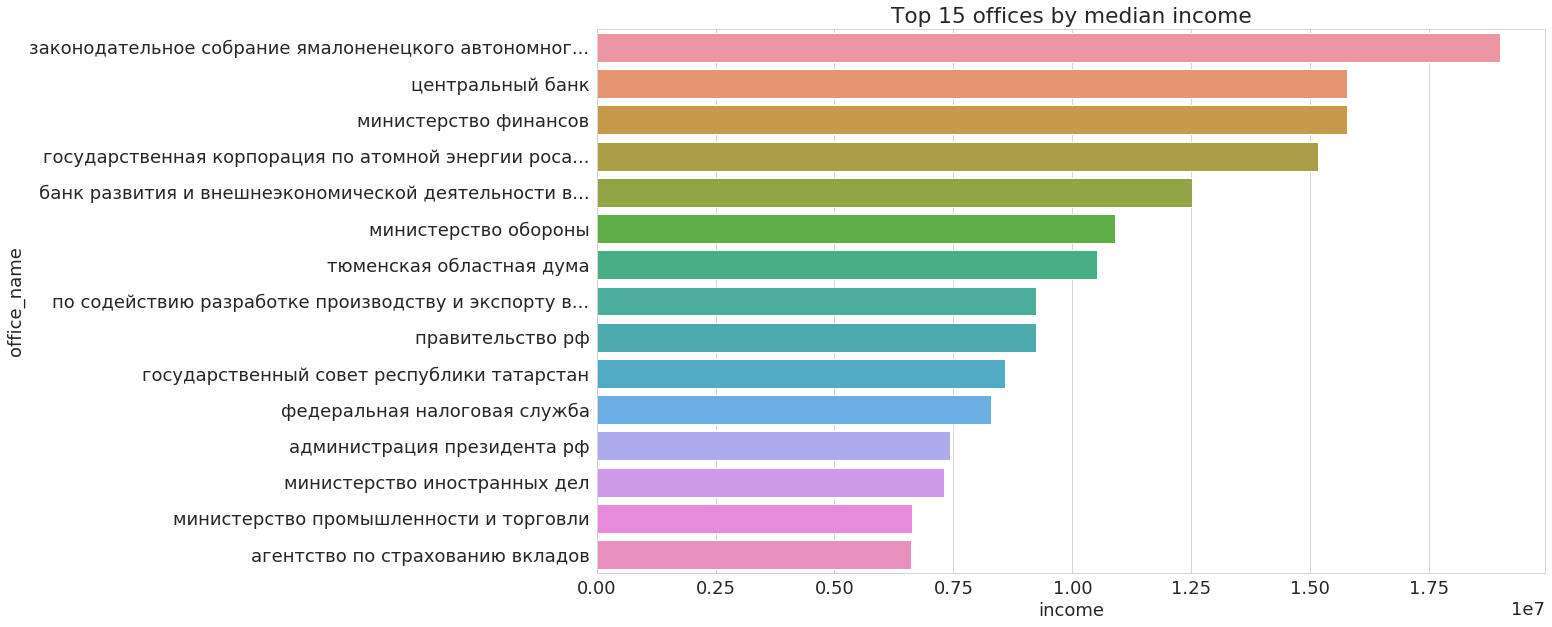

In [410]:
to_plot = office_assets_median.reset_index().head(15)
to_plot['office_name'] = to_plot.office_name.apply(lambda x: x[:50]+'...' if len(x) > 50 else x)
plt.figure(figsize=(17, 10))
plt.title('Top 15 offices by median income')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
plt.show()

Income per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


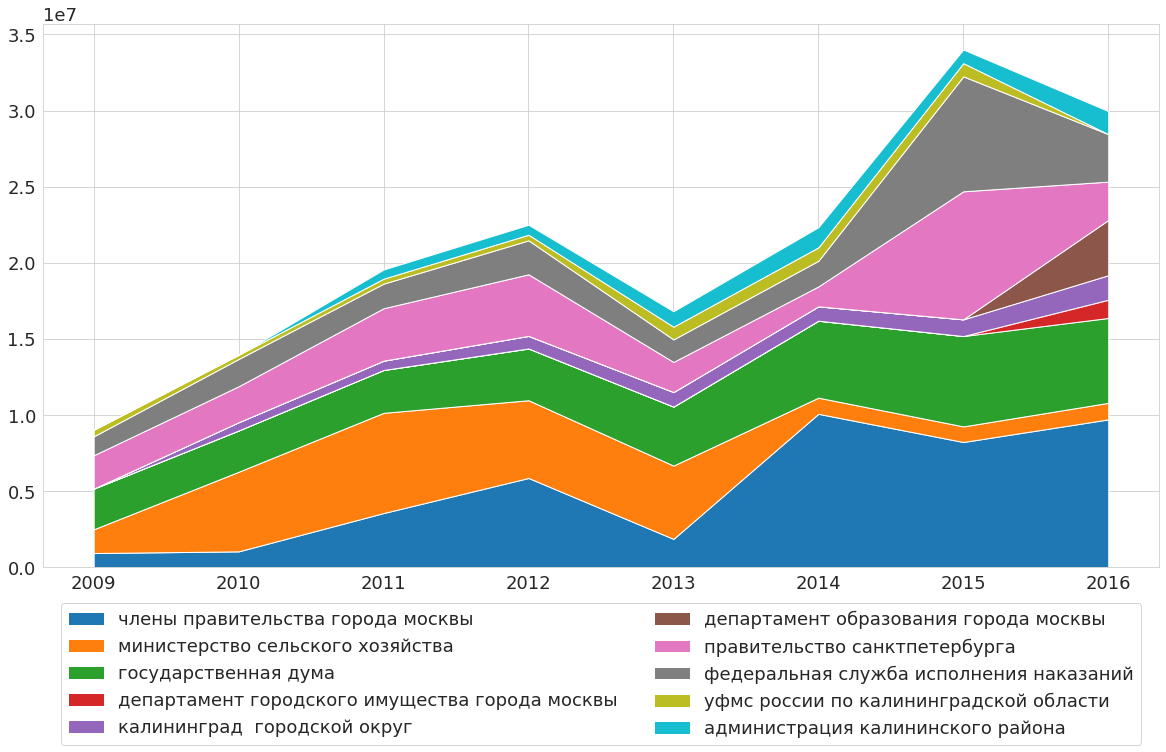

In [411]:
print('Income per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['income'].median()
grouped.head()
# Incomes per year per office
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

In [412]:
grouped.head()
g = grouped.reset_index()
g = g[g.office_id.isin(top_offices)]
g['office_name'] = office_names.ix[g.office_id].values.flatten()
g.head()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,office_id,year,income,office_name
56,14,2009,2676312.000,государственная дума
57,14,2010,2713325.325,государственная дума
58,14,2011,2815209.250,государственная дума
59,14,2012,3401201.530,государственная дума
60,14,2013,3876952.000,государственная дума


In [413]:
# Median income per office in 2016
# office_assets_median = big_office_declarations[big_office_declarations.year == 2016].groupby(['office_name']).median().sort_values(by='income', ascending=False)
# office_assets_median.head()
# to_plot = office_assets_median.head(10)
# plt.figure(figsize=(20, 7))
# plt.title('Top 10 offices by income, median, 2016')
# sns.barplot(to_plot.index, to_plot.income)
# plt.show()

In [414]:
# # Top offices by median income, by year
# tdf= big_office_declarations.groupby(['year', 'office_name'])['income'].median().reset_index()
# tdf2 = tdf.groupby('year')['income'].max().reset_index()
# tdf_final = tdf.merge(tdf2, on=['year', 'income'], how='inner')
# tdf_final.office_name = tdf_final.office_name.apply(lambda x: x.replace('\n', ' '))
# plt.figure(figsize=(15,7))
# plt.title('Top offices by median income, by year')
# sns.barplot(x='year', y='income', hue='office_name', data=tdf_final)
# plt.show()

### Income distributions
* Income percentile distributions

In [415]:
percentiles = [0, 0.75, 0.95, 0.99, 0.9999, 1]
labels = ['p'+str(percentiles[i-1]) +' - ' +str(percentiles[i]) for i in range(1, len(percentiles))]
qcut, bins = pd.qcut(income_sum, percentiles, labels=labels, retbins=True)

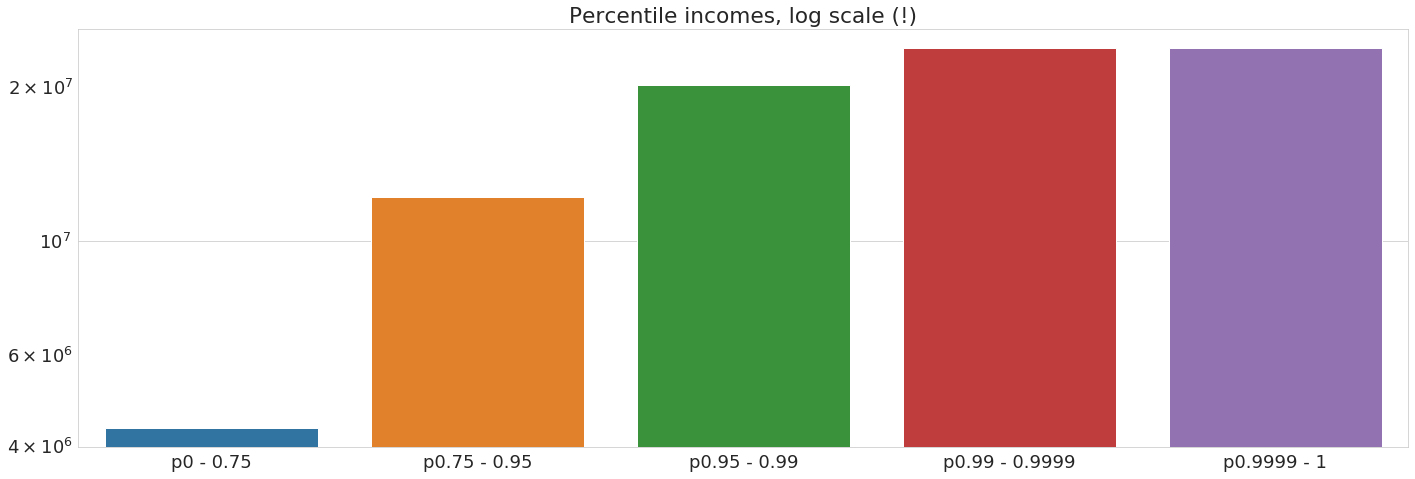

In [416]:
plt.figure(figsize=(20, 7))
plt.title('Percentile incomes, log scale (!)')
sns.barplot(labels, bins[1:])
plt.yscale('log')
save_pic('perc_inc_log')
plt.show()

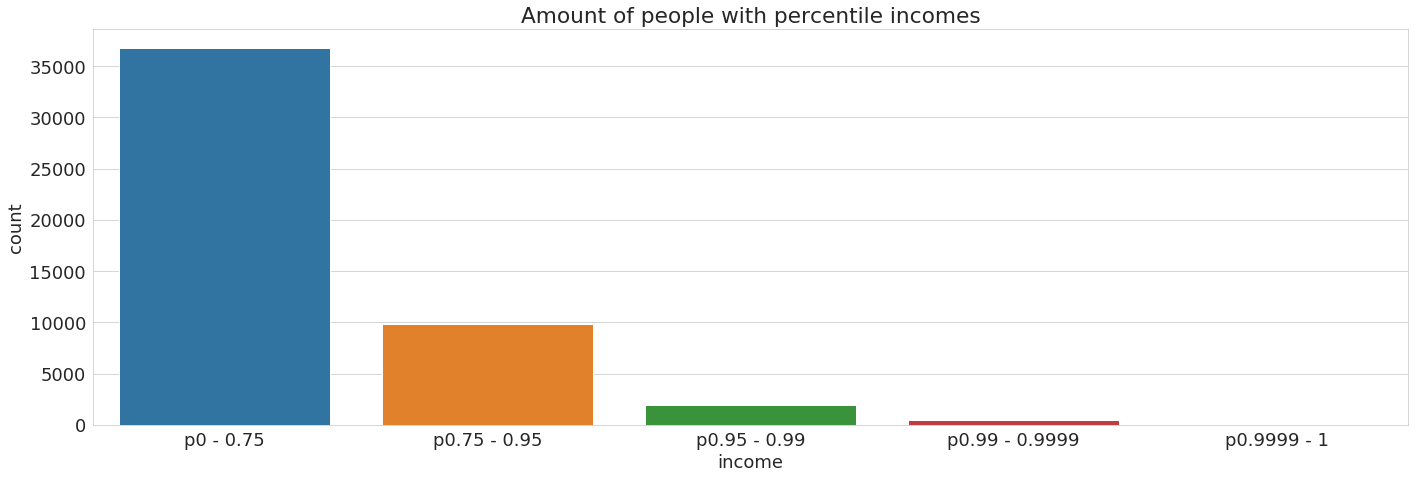

In [417]:
plt.figure(figsize=(20, 7))
plt.title('Amount of people with percentile incomes')
sns.countplot(qcut)
save_pic('perc_am_log')
plt.show()

In [418]:
income_sum.describe()

count    4.908800e+04
mean     3.645232e+06
std      3.894028e+06
min      0.000000e+00
25%      1.285185e+06
50%      2.310200e+06
75%      4.320415e+06
max      2.374638e+07
Name: income, dtype: float64

Total income


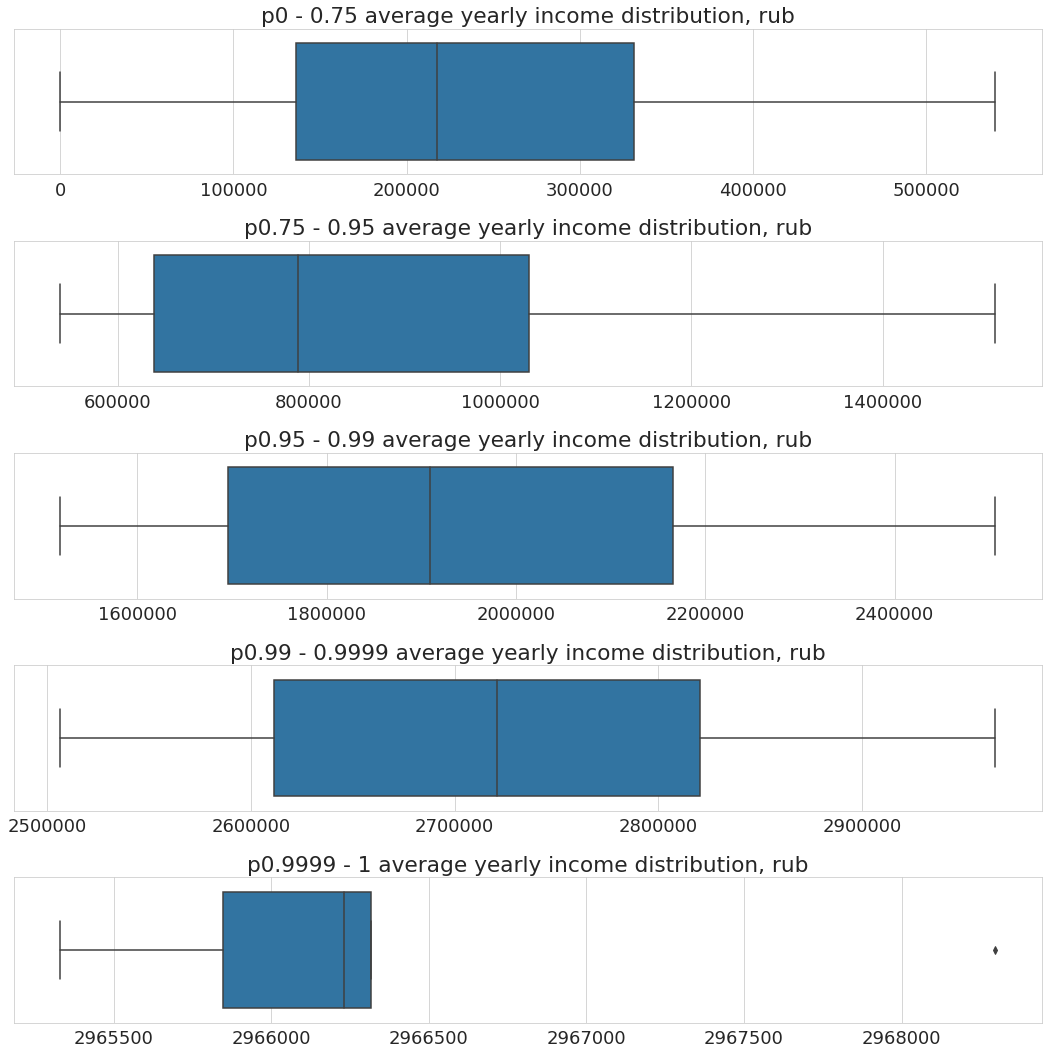

In [419]:
print('Total income')
income_yearly = income_sum / len(years)

plt.figure(figsize=(15, 15))

for i, percentile in enumerate(labels):
    plt.subplot(len(labels), 1, i+1)
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_yearly.loc[percentile_persons]
    
    plt.title(percentile +' average yearly income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income, orient='h')
    plt.xlabel('')
save_pic('boxplots_perc')
plt.show()

Total income


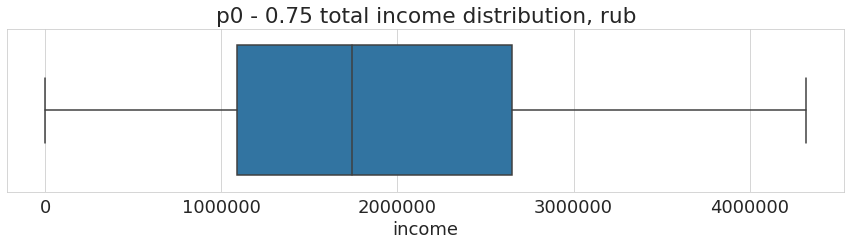

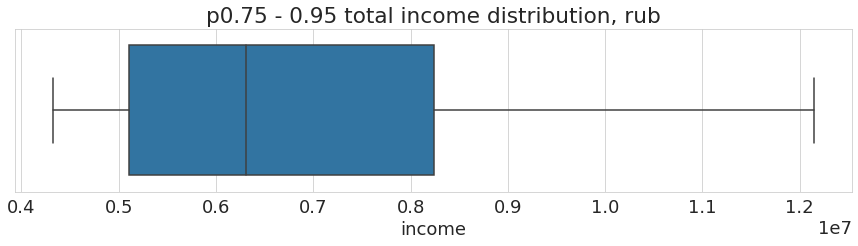

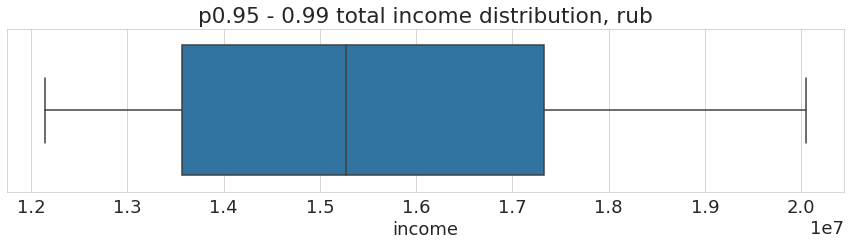

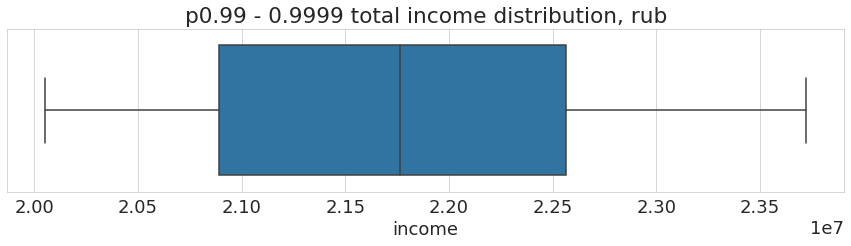

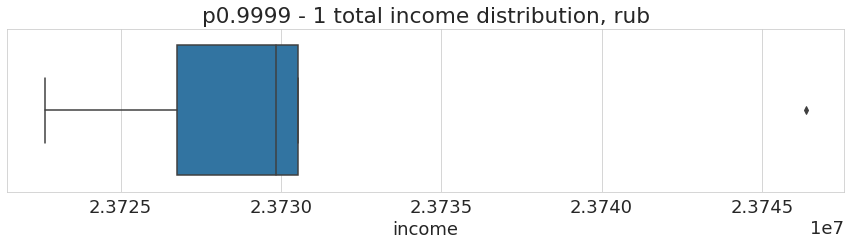

In [421]:
print('Total income')
for percentile in labels:
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_sum.loc[percentile_persons]
    
    plt.figure(figsize=(15, 3))
    plt.title(percentile +' total income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income)
    plt.show()

In [422]:
final_df = pd.DataFrame(index=range(1, 11))
for year in declarations_df.year.unique():
    tdf = declarations_df[declarations_df.year == year].groupby(['person_name'])['income'].sum().sort_values(ascending=False)
    top_10 = list(tdf.head(10).index)
    final_df[year] = top_10

print('Top 10 people by income, each year')
final_df

Top 10 people by income, each year


,2009,2010,2011,2012,2013,2014,2015,2016
1,груздев владимир сергеевич,груздев владимир сергеевич,груздев владимир сергеевич,груздев владимир сергеевич,аникеев григорий викторович,сиушов сергей иванович,ахоян галуст цолакович,пономарев валерий андреевич
2,аникеев григорий викторович,зубицкий борис давыдович,аникеев григорий викторович,борцов николай иванович,малкин ефим наумович,чемезов сергей викторович,сабиров рустам наилович,минниханов рустам нургалиевич
3,борцов николай иванович,борцов николай иванович,петров сергей анатольевич,аникеев григорий викторович,слипенчук михаил викторович,груздев владимир сергеевич,ильтяков дмитрий владимирович,чемезов сергей викторович
4,гребенкин олег анатольевич,дарькин сергей михайлович,гурьев андрей григорьевич,ананьев дмитрий николаевич,груздев владимир сергеевич,аникеев григорий викторович,басанский александр александрович,богомаз александр васильевич
5,комаров фоат фагимович,медведев евгений николаевич,борцов николай иванович,каланда владимир александрович,дарькин сергей михайлович,соколов михаил юрьевич,глебова любовь николаевна,рассудов александр николаевич
6,шувалов игорь иванович,гребенкин олег анатольевич,малкин виталий борисович,гурьев андрей григорьевич,чемезов сергей викторович,зотов владимир федорович,дерев эдуард вячеславович,палкин андрей васильевич
7,волков юрий николаевич,аникеев григорий викторович,хлопонин александр геннадиевич,петров сергей анатольевич,симановский леонид яковлевич,слипенчук михаил викторович,пономарев валерий андреевич,некрасов александр николаевич
8,зубицкий борис давыдович,резник владислав матусович,милявский александр борисович,саблин дмитрий вадимович,борцов николай иванович,некрасов александр николаевич,евтушок игорь петрович,кузнецов лев владимирович
9,володин вячеслав викторович,муравленко сергей викторович,слипенчук михаил викторович,пичугов виктор александрович,шувалов игорь иванович,вайнштейн сергей евгеньевич,шутов андрей васильевич,борцов николай иванович
10,зеленин дмитрий вадимович,шувалов игорь иванович,мошкович вадим николаевич,чемезов сергей викторович,богомаз александр васильевич,басанский александр александрович,симановский леонид яковлевич,седых марина владимировна


In [423]:
years_worked = declarations_df.groupby(['person_id'])['year'].nunique()
years_worked.name = 'years worked'
years_worked.head()

person_id
8     8
9     8
10    7
11    4
12    8
Name: years worked, dtype: int64

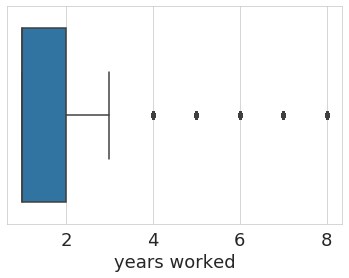

In [424]:
plt.figure()
sns.boxplot(years_worked)
plt.show()

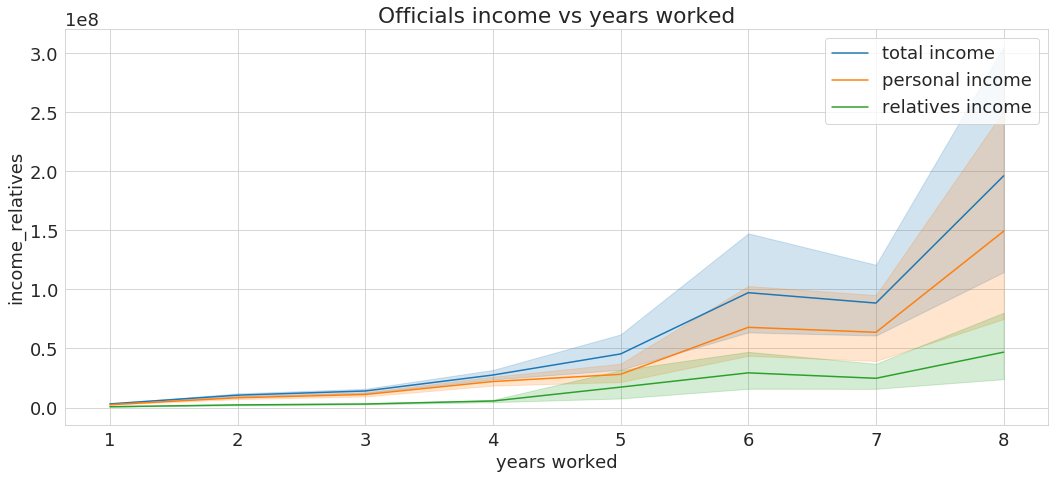

In [425]:
income_df = declarations_df.groupby(['person_id'])['income', 'income_personal', 'income_relatives'].sum()
income_df = income_df.loc[years_worked.index]
plt.figure(figsize=(15, 7))
plt.title('Officials income vs years worked')
sns.lineplot(years_worked, income_df.income, label ='total income')
sns.lineplot(years_worked, income_df.income_personal, label='personal income')
sns.lineplot(years_worked, income_df.income_relatives, label='relatives income')
save_pic('income_vs_years')
plt.show()

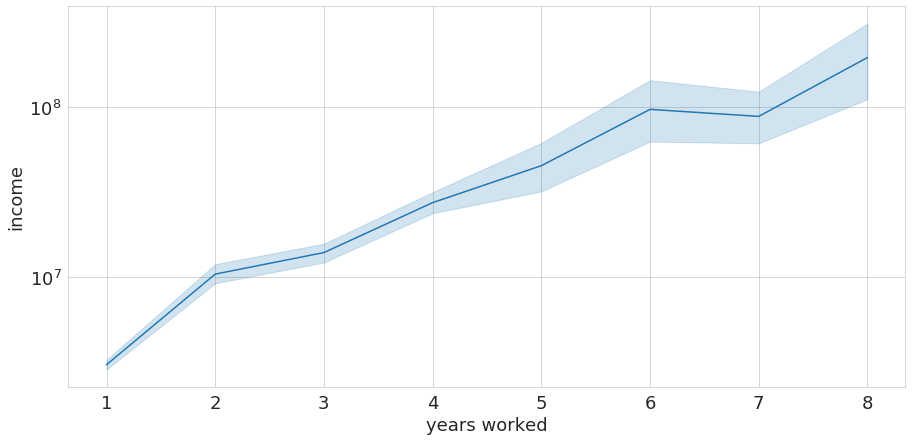

In [426]:
# We can observe a log dependency
plt.figure(figsize=(15, 7))
sns.lineplot(years_worked, income_df.income)
plt.yscale('log')
plt.show()

In [427]:
print('Median', income_df.median())

print('Std', income_df.std())

Median income              2440718.515
income_personal     1896607.460
income_relatives     286666.670
dtype: float64
Std income              1.083528e+08
income_personal     8.879602e+07
income_relatives    4.239546e+07
dtype: float64


In [428]:
# Income change
# Latest income vs centrality
# 
yearly_income = declarations_df[(declarations_df.year >= 2013) &
                                            (declarations_df.year <= 2016)].groupby(['person_id', 'year'])[['income', 'income_personal', 'income_relatives']].sum().reset_index()
print(yearly_income.shape)
yearly_income.head()

(76046, 5)


,person_id,year,income,income_personal,income_relatives
0,8,2013,3392882.89,3194615.67,198267.22
1,8,2014,4650875.15,4460788.41,190086.74
2,8,2015,6722705.23,6538890.04,183815.19
3,8,2016,5686755.42,5499187.78,187567.64
4,9,2013,18133519.25,16647820.37,1485698.88


In [429]:
years_count = yearly_income.reset_index().groupby(['person_id'])['year'].count().reset_index()
years_count.head()

,person_id,year
0,8,4
1,9,4
2,10,3
3,12,4
4,13,4


In [430]:
# Remove those that haven't worked for 4 years
yearly_income = yearly_income[yearly_income.person_id.isin(years_count[years_count.year >= 2].person_id)]
yearly_income.shape

(46469, 5)

In [431]:
max_years = yearly_income.groupby(['person_id'])['year'].idxmax()
max_incomes = yearly_income.loc[max_years]
max_incomes.index = max_incomes.person_id
max_incomes.head()

,person_id,year,income,income_personal,income_relatives
person_id,,,,,
8,8,2016,5686755.42,5499187.78,187567.64
9,9,2016,25168247.27,21877770.76,3290476.51
10,10,2015,5775076.27,4875905.09,899171.18
12,12,2016,8025912.94,5641096.59,2384816.35
13,13,2016,5736078.02,5349746.68,386331.34


In [432]:
min_years = yearly_income.groupby(['person_id'])['year'].idxmin()
min_incomes = yearly_income.loc[min_years]
min_incomes.index = max_incomes.person_id
min_incomes.head()

,person_id,year,income,income_personal,income_relatives
person_id,,,,,
8,8,2013,3392882.89,3194615.67,198267.22
9,9,2013,18133519.25,16647820.37,1485698.88
10,10,2013,4368530.71,3655249.56,713281.15
12,12,2013,2802081.80,2541317.22,260764.58
13,13,2013,3263364.19,2943197.15,320167.04


In [433]:
income_change = max_incomes['income'] - min_incomes['income']
income_change.head()

person_id
8     2293872.53
9     7034728.02
10    1406545.56
12    5223831.14
13    2472713.83
Name: income, dtype: float64

In [434]:
income_change = income_change[income_change.between(income_change.quantile(.5),
                                                    income_change.quantile(.95))]
income_change.shape

(8746,)

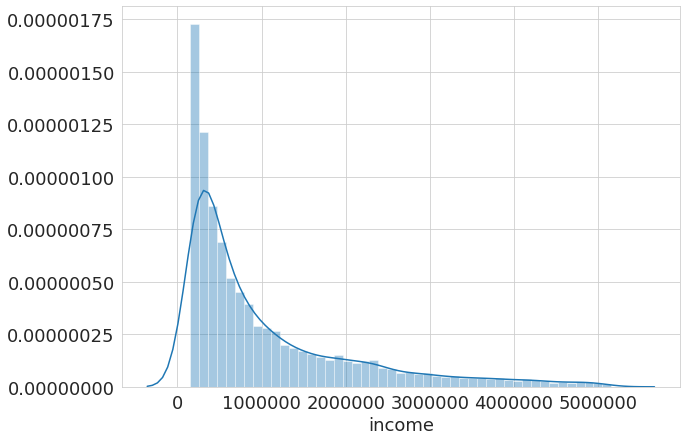

In [435]:
plt.figure(figsize=(10, 7))
sns.distplot(income_change)
plt.show()

In [387]:
# Scratch area below

degree
(8660, 3)
Pearson:
(0.03215135472376775, 0.0027686728829965754)
Spearman:
SpearmanrResult(correlation=-0.015328434331078621, pvalue=0.15377354044255634)



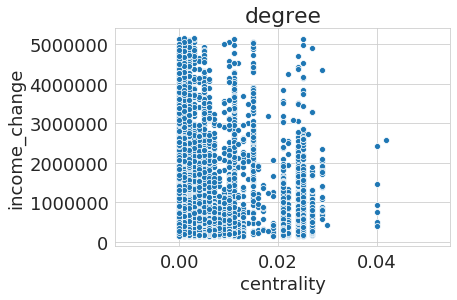

betweenness
(8660, 3)
Pearson:
(0.02657662695982233, 0.01338801944773941)
Spearman:
SpearmanrResult(correlation=0.01650640267595763, pvalue=0.1245496084379898)



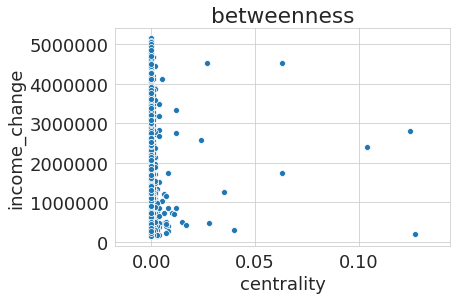

closeness
(8656, 3)
Pearson:
(-0.017679419632403274, 0.10002297940601823)
Spearman:
SpearmanrResult(correlation=0.12074008652493012, pvalue=1.7836559704603453e-29)



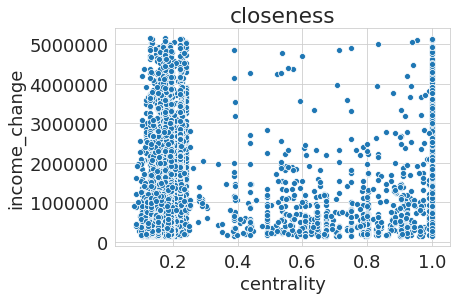

In [388]:
import json
centralities = ['degree', 'betweenness', 'closeness']
for cname in centralities:
    with open(f'data/{cname}_centrality.json') as f:
        jsondata = json.loads(f.read())
        centrality = pd.DataFrame(jsondata.items())
    centrality.columns = ['person_id', 'centrality']
    centrality['person_id'] = centrality['person_id'].astype(int)
    centrality.index = centrality.person_id
    centrality['income_change'] = income_change
    centrality = centrality.dropna()
    print(cname)
    print(centrality.shape)
    print('Pearson:')
    print(scipy.stats.pearsonr(centrality.income_change, centrality.centrality))
    print('Spearman:')
    print(scipy.stats.spearmanr(centrality.income_change, centrality.centrality))
    print('')
    
    plt.figure()
    sns.scatterplot(y=centrality.income_change, x=centrality.centrality)
    plt.title(cname)
    plt.show()